# Data Analysis for Households Expenditure Based on Employment Status
 
## Librabries used

In [2]:
#List of imports and librabaries used

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Import CSV

In [3]:
#Read the csv into dataframe

A17 = pd.read_csv('A17-Household expenditure by economic activity status of the household reference person.csv')
A17

,Expenditure_Category,Employment_Status,Year,Expenditure
0,Food and non-alcoholic drinks,Full-time,2015,65.3
1,Food and non-alcoholic drinks,Part-time,2015,58.8
2,Food and non-alcoholic drinks,Self Employed,2015,73.3
3,Food and non-alcoholic drinks,Unemployed,2015,40.7
4,Food and non-alcoholic drinks,Economically innactive/ Retired,2015,48.0
...,...,...,...,...
499,Other expenditure items,Part-time,2020,69.5
500,Other expenditure items,Self Employed,2020,98.0
501,Other expenditure items,Unemployed,2020,54.8
502,Other expenditure items,Economically innactive/ Retired,2020,48.7


## Preprocessing

In [4]:
#Drop unused rows

A17 = A17[A17.Expenditure_Category != 'All expenditure groups']

#Replaced values with numbers
A17 = A17.replace(['Food and non-alcoholic drinks','Alcoholic drinks, tobacco and narcotics','Clothing and footwear','Housing (net)2, fuel and power','Household goods and services','Health','Transport','Communication','Recreation and culture','Education','Restaurants and hotels','Miscellaneous goods and services','Other expenditure items'], [1,2,3,4,5,6,7,8,9,10,11,12,13])
A17 = A17.replace(['Full-time','Part-time','Self Employed','Unemployed','Economically innactive/ Retired','Other'],[1,2,3,4,5,6])
print(A17.info())
print(A17.describe())

#Check the data frame values
print(A17['Expenditure_Category'].unique())
print(A17['Employment_Status'].unique())
print(A17['Year'].unique())
print(A17['Expenditure'].unique())

print(A17)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 503
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expenditure_Category  468 non-null    int64  
 1   Employment_Status     468 non-null    int64  
 2   Year                  468 non-null    int64  
 3   Expenditure           468 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 18.3 KB
None
       Expenditure_Category  Employment_Status         Year  Expenditure
count            468.000000         468.000000   468.000000   468.000000
mean               7.000000           3.500000  2017.500000    39.045513
std                3.745661           1.709653     1.709653    27.626638
min                1.000000           1.000000  2015.000000     0.200000
25%                4.000000           2.000000  2016.000000    13.975000
50%                7.000000           3.500000  2017.500000    33.100000
75%               10.00

## Split into smaller dataframe

In [5]:
#Split the dataframe by years

A17_2015=A17[A17['Year'] == 2015]
A17_2016=A17[A17['Year'] == 2016]
A17_2017=A17[A17['Year'] == 2017]
A17_2018=A17[A17['Year'] == 2018]
A17_2019=A17[A17['Year'] == 2019]
A17_2020=A17[A17['Year'] == 2020]

In [6]:
#Split the dataframe by expenditure categories

A17_EC1=A17[A17['Expenditure_Category'] == 1]
A17_EC2=A17[A17['Expenditure_Category'] == 2]
A17_EC3=A17[A17['Expenditure_Category'] == 3]
A17_EC4=A17[A17['Expenditure_Category'] == 4]
A17_EC5=A17[A17['Expenditure_Category'] == 5]
A17_EC6=A17[A17['Expenditure_Category'] == 6]
A17_EC7=A17[A17['Expenditure_Category'] == 7]
A17_EC8=A17[A17['Expenditure_Category'] == 8]
A17_EC9=A17[A17['Expenditure_Category'] == 9]
A17_EC10=A17[A17['Expenditure_Category'] == 10]
A17_EC11=A17[A17['Expenditure_Category'] == 11]
A17_EC12=A17[A17['Expenditure_Category'] == 12]
A17_EC13=A17[A17['Expenditure_Category'] == 13]

In [7]:
#Split the dataframe by employment status

A17_ES1=A17[A17['Employment_Status'] == 1]
A17_ES2=A17[A17['Employment_Status'] == 2]
A17_ES3=A17[A17['Employment_Status'] == 3]
A17_ES4=A17[A17['Employment_Status'] == 4]
A17_ES5=A17[A17['Employment_Status'] == 5]
A17_ES6=A17[A17['Employment_Status'] == 6]

## Check Outliers

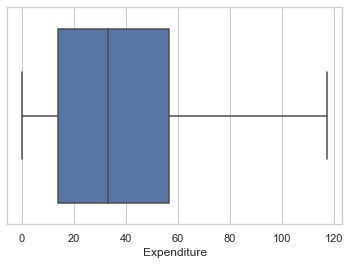

In [8]:
#Boxplot to see is there any outlier 

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=A17["Expenditure"])

#No presence of outlier found

## Overall Visualisation

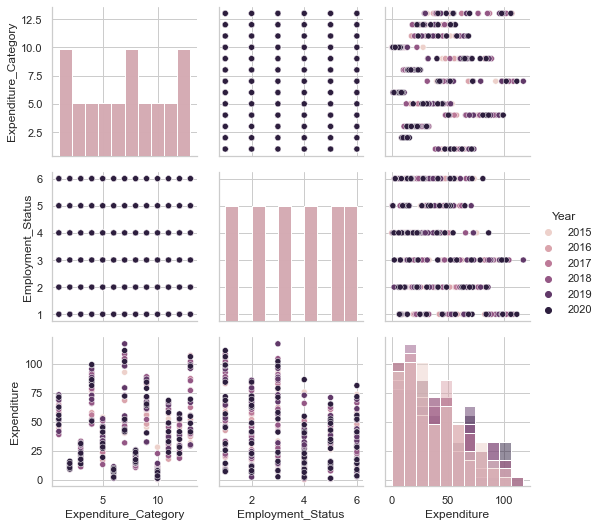

In [9]:
#Get the overall scatterplot visualisation

g = sns.PairGrid(A17, hue="Year")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Year", adjust_subtitles=True)

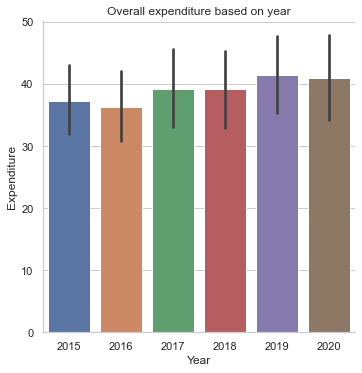

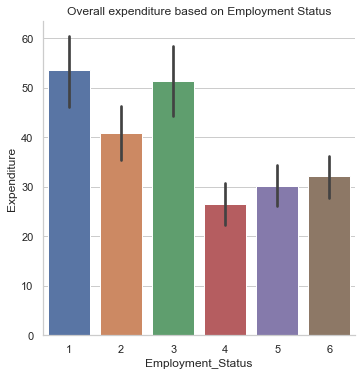

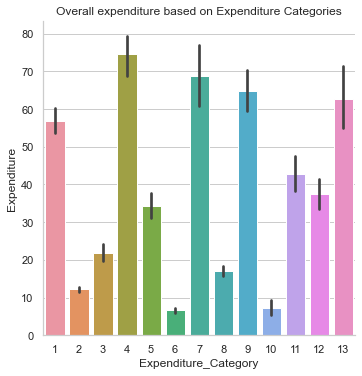

In [10]:
#Overall expenditure based on Year, Employment Status and Expenditure Categories

sns.catplot(x="Year", y="Expenditure", data=A17, kind="bar").set(title="Overall expenditure based on year")

sns.catplot(x="Employment_Status", y="Expenditure", data=A17, kind="bar").set(title="Overall expenditure based on Employment Status")

sns.catplot(x="Expenditure_Category", y="Expenditure", data=A17, kind="bar").set(title="Overall expenditure based on Expenditure Categories")


## Visualisation based on Expenditure Category

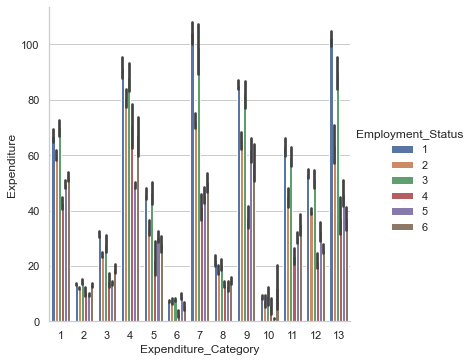

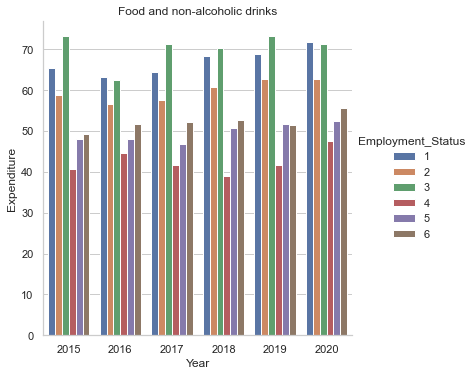

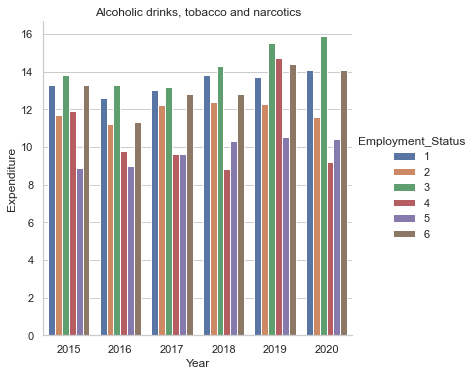

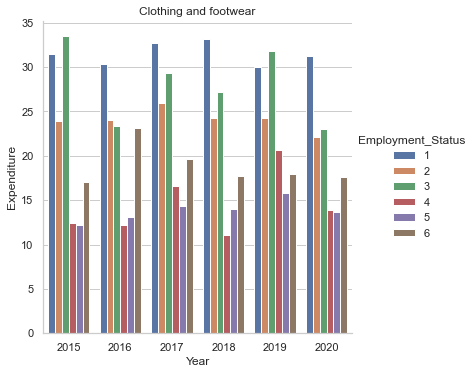

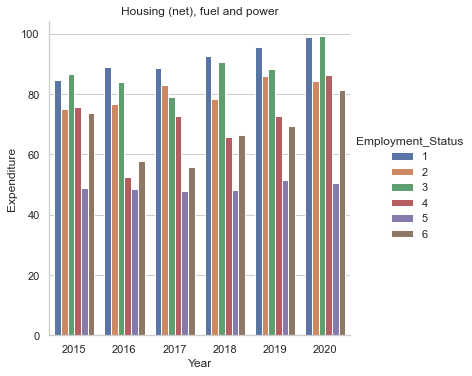

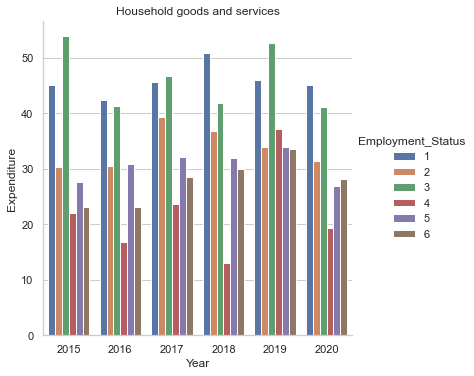

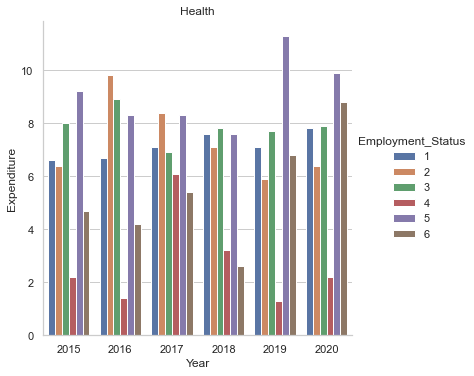

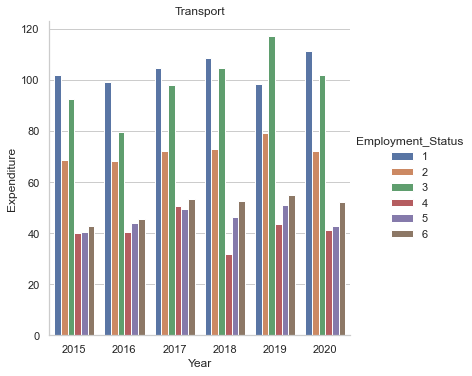

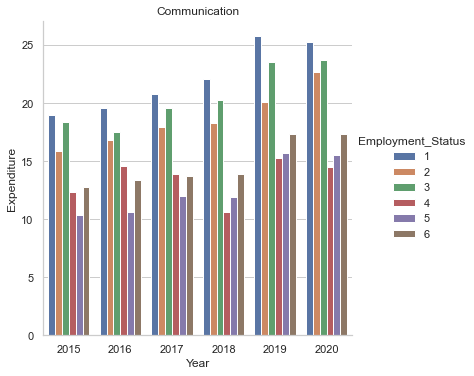

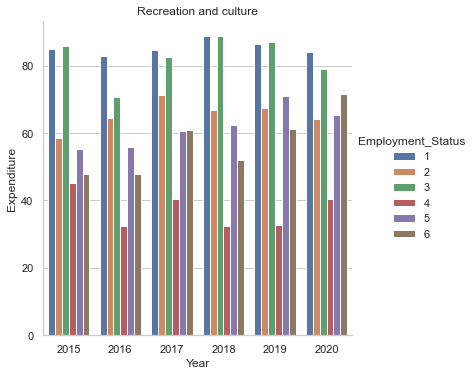

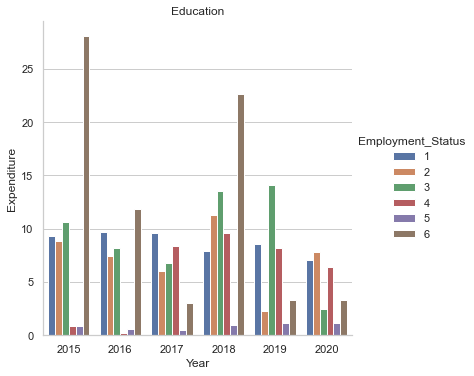

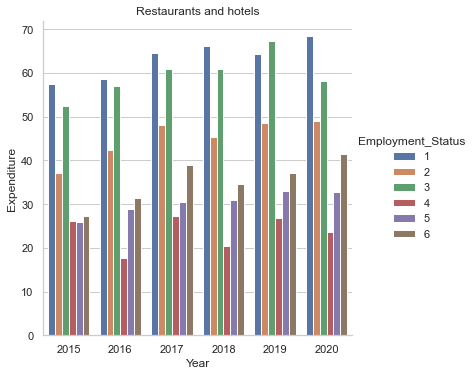

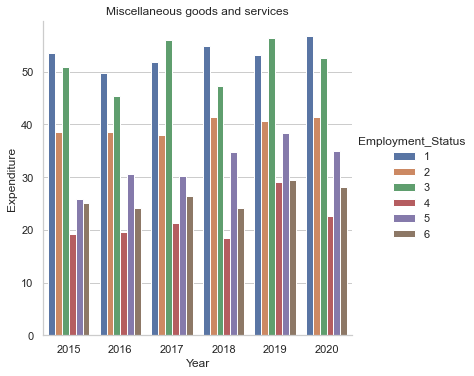

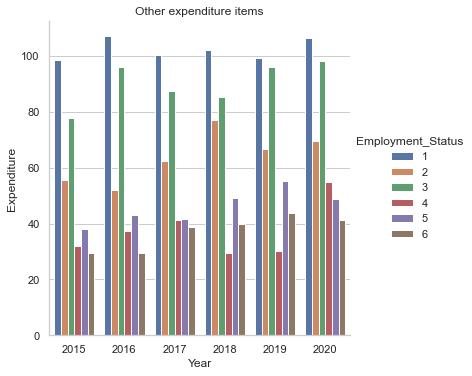

In [11]:
#Detailed Bar Charts based on expenditure category

sns.catplot(x="Expenditure_Category", y="Expenditure", hue="Employment_Status", data=A17, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC1, kind="bar").set(title='Food and non-alcoholic drinks')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC2, kind="bar").set(title='Alcoholic drinks, tobacco and narcotics')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC3, kind="bar").set(title='Clothing and footwear')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC4, kind="bar").set(title='Housing (net), fuel and power')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC5, kind="bar").set(title='Household goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC6, kind="bar").set(title='Health')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC7, kind="bar").set(title='Transport')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC8, kind="bar").set(title='Communication')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC9, kind="bar").set(title='Recreation and culture')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC10, kind="bar").set(title='Education')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC11, kind="bar").set(title='Restaurants and hotels')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC12, kind="bar").set(title='Miscellaneous goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17_EC13, kind="bar").set(title='Other expenditure items')

Expenditure_Category         1      2      3      4          5         6   \
Year                                                                        
2015                  55.883333  12.15  21.75  74.15  33.716667  6.183333   
2015                  55.883333  12.15  21.75  74.15  33.716667  6.183333   
2015                  55.883333  12.15  21.75  74.15  33.716667  6.183333   
2015                  55.883333  12.15  21.75  74.15  33.716667  6.183333   
2015                  55.883333  12.15  21.75  74.15  33.716667  6.183333   
...                         ...    ...    ...    ...        ...       ...   
2020                  60.216667  12.55  20.25  83.50  32.016667  7.166667   
2020                  60.216667  12.55  20.25  83.50  32.016667  7.166667   
2020                  60.216667  12.55  20.25  83.50  32.016667  7.166667   
2020                  60.216667  12.55  20.25  83.50  32.016667  7.166667   
2020                  60.216667  12.55  20.25  83.50  32.016667  7.166667   

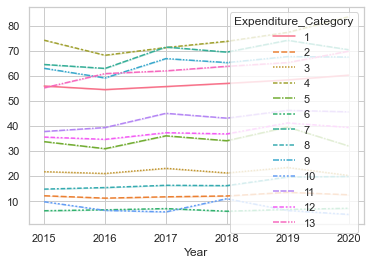

In [14]:
#Get the line chart based on Expenditure Category

order = A17['Year']
A17_wide = A17.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A17_wide = A17_wide.reindex(order, axis=0)

print(A17_wide)
sns.lineplot(data=A17_wide)
plt.show()

## Visualisation based on year

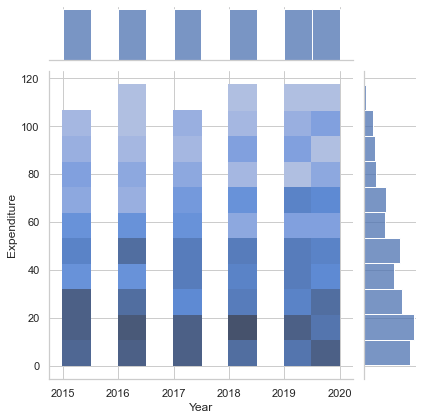

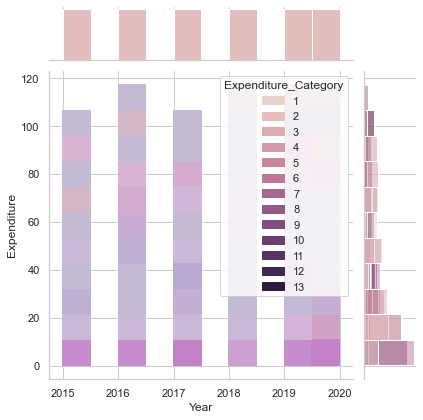

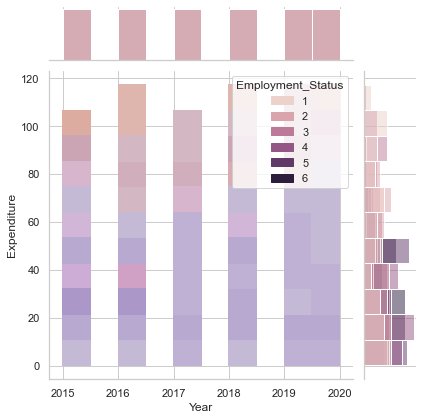

In [17]:
#Show the joint charts based on Year

sns.jointplot(x="Year", y="Expenditure", data=A17, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Employment_Status", data=A17, kind="hist")

<AxesSubplot:title={'center':'Year 2020'}, ylabel='Expenditure'>

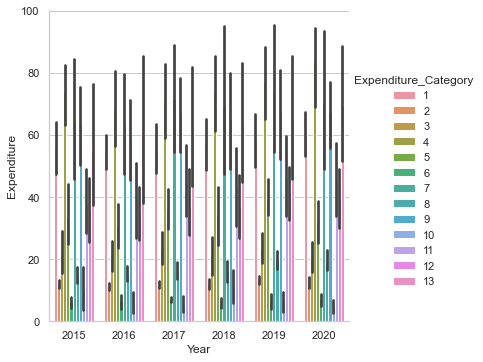

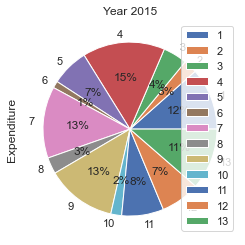

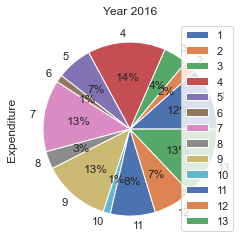

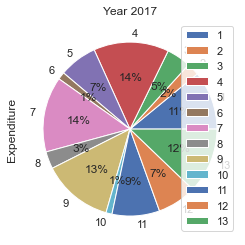

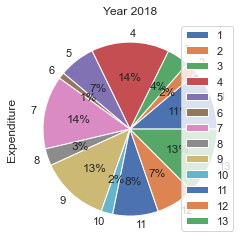

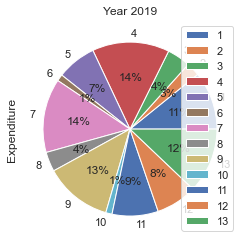

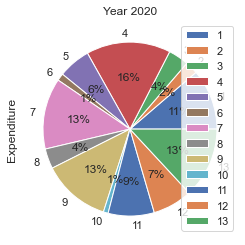

In [13]:
#Detailed Bar Charts and pie charts based on Year

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17, kind="bar")

A17_2015.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2015")

A17_2016.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2016")

A17_2017.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2017")

A17_2018.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2018")

A17_2019.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2019")

A17_2020.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2020")

## Visualisation based on Employment Status

Employment_Status          1          2          3          4          5  \
Year                                                                       
2015               51.646154  37.661538  50.600000  26.200000  27.061538   
2015               51.646154  37.661538  50.600000  26.200000  27.061538   
2015               51.646154  37.661538  50.600000  26.200000  27.061538   
2015               51.646154  37.661538  50.600000  26.200000  27.061538   
2015               51.646154  37.661538  50.600000  26.200000  27.061538   
...                      ...        ...        ...        ...        ...   
2020               56.038462  41.938462  51.869231  29.415385  31.176923   
2020               56.038462  41.938462  51.869231  29.415385  31.176923   
2020               56.038462  41.938462  51.869231  29.415385  31.176923   
2020               56.038462  41.938462  51.869231  29.415385  31.176923   
2020               56.038462  41.938462  51.869231  29.415385  31.176923   

Employment_

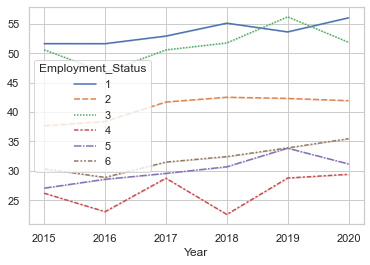

In [12]:
#Get the line chart based on Employment Status

order = A17['Year']
A17_wide = A17.pivot_table(index='Year', columns='Employment_Status', values='Expenditure')
A17_wide = A17_wide.reindex(order, axis=0)

print(A17_wide)
sns.lineplot(data=A17_wide)
plt.show()

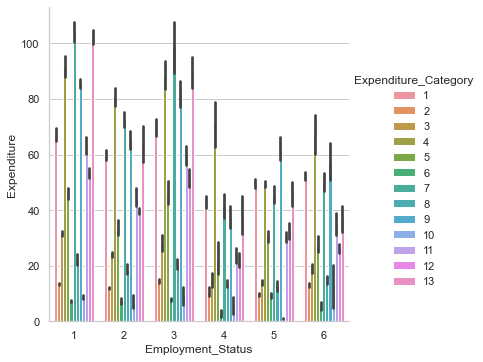

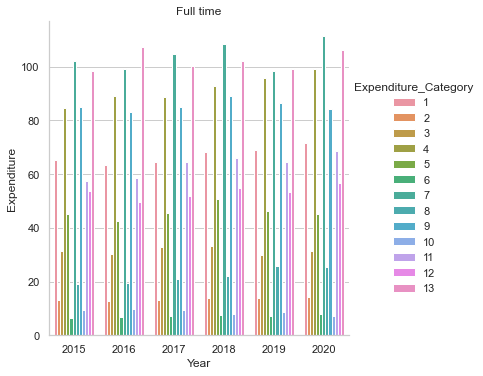

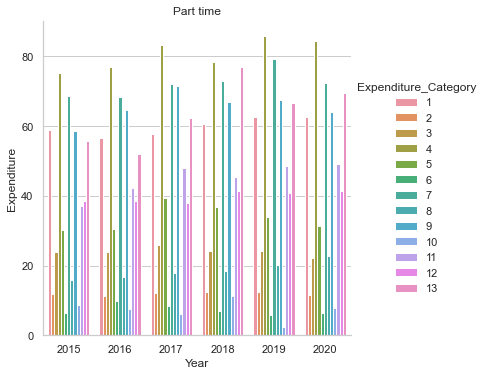

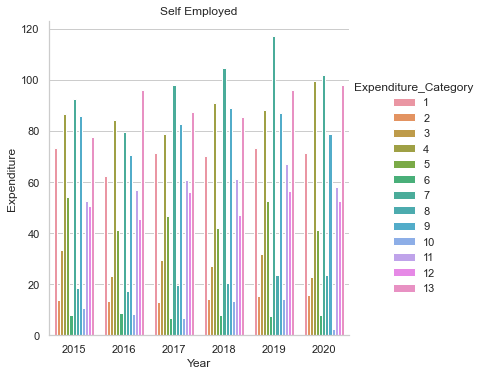

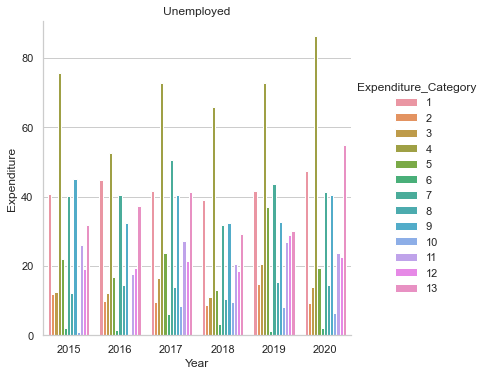

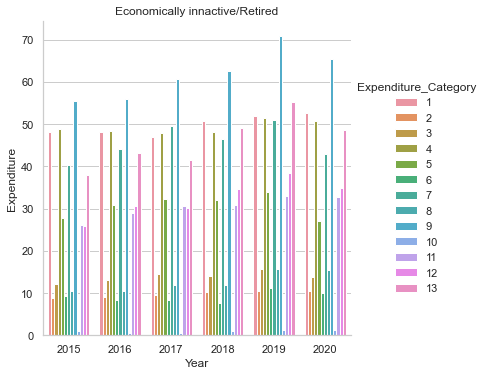

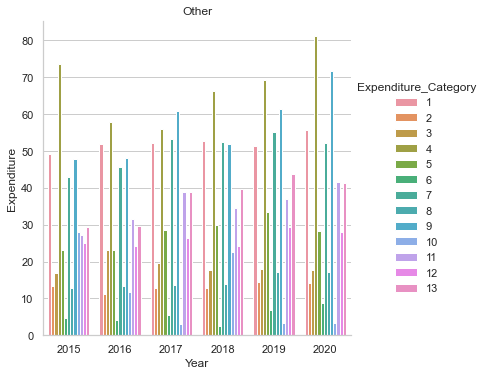

In [20]:
#Detailed Bar Charts based on employment status

sns.catplot(x="Employment_Status", y="Expenditure", hue="Expenditure_Category", data=A17, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES1, kind="bar").set(title='Full time')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES2, kind="bar").set(title='Part time')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES3, kind="bar").set(title='Self Employed')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES4, kind="bar").set(title='Unemployed')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES5, kind="bar").set(title='Economically innactive/Retired')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A17_ES6, kind="bar").set(title='Other')